# Data Pre-Processing 
### Authors: Grace Pham, Heidi Tran, Jessica Jha, Khanh Tran

In order to downsize the data, a local cluster of sample code from the IBM notebook was run on Apache Spark, an open-source cloud clustering platform. A smaller subset of data was able to be extracted so that all of our group members were able to have access to the same data to split pre-processing tasks. 
 


In this preprocessing stage, we have listed out our tasks:
1. Calculate % of missing value for each column (function)
2. Duplicated row (one line)
3. Calculate % of outliers + draw a box plot (or equiv) to visualize the outliers 
4. Drop the state in OriginStateName column  (give reasonings) 
5. Drop Quarter and DayOfWeek (give some reasonings) 
6. Only keep rows where Cancelled = 0 
7. Drop DepDel15  
8. Drop columns with > 95% missing values 
9. Add the data dictionary to the note book (basically column name + type + description) 
10. Convert columns' data types to the correct types. eg: Columns contain date should have datetime type, boolean column should have int type, etc. 


### Data Dictionary


| Field Name | Type | Description |
| --- | --- | --- |
| Year | int64 | year of the flight |
| Month | int64 | month of the flight  |
| DayofMonth | int64 | day of the month  |
| FlightDate | datetime64[ns] | date of the flight |
| Reporting_Airline | object | unique airline carrier code|
| DOT_ID_Reporting_Airline | int64 | Number assigned by US DOT to identify a unique airline |
| IATA_CODE_Reporting_Airline | object | Airline Code assigned by IATA |
| Tail_Number | object | Aircraft tail number |
| Flight_Number_Reporting_Airline | int64 | Flight Number |
| OriginAirportID | int64 | Origin Airport ID |
| OriginAirportSeqID | int64 | Origin Airport Sequence ID |
| OriginCityMarketID | int64 | Origin City Market ID |
| Origin | object | Origin Airport Code|
| OriginCityName | object | Origin City Name |
| OriginState | object | Origin State | 
| OriginStateFips | int64 | Origin State FIPS place code | 
| DestAirportID | int64 | Destination Airport ID |
| DestAirportSeqID | int64 | Destination Airport Sequence ID |
| OriginWac | int64 | Origin Airport World Area Code |
| DestCityMarketID | int64 | Destination City Market ID |
| Dest | object | Destination Airport Code |
| DestCityName | object | Destination City Name | 
| DestState | object | Destination State | 
| DestStateFips | int64 | Destination State FIPS code |
| DestStateName | object | Destination State Name |
| DestWac | int64 | Destination Airport World Area Code |
| CRSDepTime | int64 | Computer Reservation System (scheduled) Departure Time |
| DepTime | float64 | Departure Time (hhmm) |
| DepDelay | float64 | Departure delay (minutes) |
| DepDelayMinutes | float64 | Absolute value of DepDelay |
| DepartureDelayGroups | float64 | Departure delay 15 minute interval group |
| DepTimeBlk | object | Computer Reservation System (scheduled) time block |
| TaxiOut | float64 | Taxi out time (minutes) |
| WheelsOff | float64 | Wheels off time (local time, hhmm) |
| WheelsOn | float64 | Wheels on time (local time hhmm) |
| TaxiIn | float64 | Taxi in time (minutes) |
| CRSArrTime | int64 | Computer Reservation System (scheduled)
Arrival Time |
| ArrTime | float64 | Arrival time (local time, hhmm) |
| ArrDelay | float64 | Arrival delay (minutes) |
| ArrDelayMinutes | float64 | Absolute value of ArrDelay |
| ArrDel15 | float64 | Arrival Delay >15? |
| ArrivalDelayGroups | float64 | Arrival delay 15 minute  interval group |
| ArrTimeBlk | object | Computer Reservation System (scheduled) arrival time block |
| Cancelled | float64 | 1 = canceled |
| Diverted | float64 | 1 = diverted |
| CRSElapsedTime | float64 | Computer Reservation System (scheduled) elapsed time |
| ActualElapsedTime | float64 | Actual elapsed time |
| AirTime | float64 | Flight time (minutes) |
| Distance | float64 | Distance between airports (miles) |
| DistanceGroup | int64 | 250 mile distance interval group |
| CarrierDelay | float64 | Carrier delay (minutes) |
| WeatherDelay | float64 | Weather delay (minutes) |
| NASDelay | float64 | National Air System delay (minutes) |
| SecurityDelay | float64 | Security delay (minutes) |
| LateAircraftDelay | float64 | Late aircraft delay (minutes) |
| DivAirportLandings | int64 | Number of diverted airport landings |                     

### Import packages

In [ ]:
import sys
import json
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
#from google.colab import data_table
# import <put_your_packages_here>

# Config seaborn
sns.set(rc={"figure.figsize":(12, 10)})
sns.set_style("whitegrid")

### Common utilities that we can re-use.

these functions were given to us by IBM sample notebook

In [ ]:
from re import I
def reduce_mem_usage(self, df: pd.DataFrame) -> pd.DataFrame:
    """Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
        I doubt that we would use up what Colab gives us in the free tier, but still it's a helpful util.
    :param df: pandas DataFrame    
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(self, file: str, json:False) -> pd.DataFrame:
    """Create a dataframe and optimize its memory usage
    :param file: filepath.
    """
    if json:
        try:
            df = pd.read_json(file)
            df = self.reduce_mem_usage(df)
        except ValueError:
            df = pd.read_json(file, lines=True)
            df = self.reduce_mem_usage(df)
    elif not json:
        df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
        df = self.reduce_mem_usage(df)
    return df

# TODO: Feel free to write the function.
def get_data_from_api():
    """
    """
    pass

    
def index_file_checker(df, col_name):
    """
    """
    return df[df[col_name].isnull()].index.tolist()


def check_field(df, col_name):
    """
    """
    ind_miss = index_file_checker(df=df, col_name=col_name)
    
    if ind_miss == []:
        print("No Null values of {x}".format(x = col_name))
        if len(df) == len(df[col_name].unique()):
            print("All records of {x} is populated for the \"M Field\" and are unique".format(x = col_name))
            
    else:
        pctMissing = 100*(len(ind_miss)/len(df))
        print(f"Percentage of missing {col_name} field: {pctMissing:.2f}%")


def check_duplicate_values(df: pd.DataFrame, col_name: str =None):
    '''Check for duplicate values in a given column in a given dataframe. If no column is given, only check for duplicate rows in the dataframe.
    '''
    try:
        if col_name is not None:
            dups = df.duplicated(subset=[col_name], keep='first')
            len_dups = len(dups[dups==True])
            percent_dups = 100*len_dups/len(df)

            if len_dups == 0:
                print(f"\nNo duplicate values in {col_name} field.")
            elif len_dups > 0:
                print(f"\nPercentage of duplicate values in {col_name} field: {percent_dups}")
                print(f"Percentage of unique values in {col_name} field: {100-percent_dups}")
        elif col_name is None:
            dups = df.duplicated(keep='first')
            len_dups = len(dups[dups==True])
            percent_dups = 100*len_dups/len(df)
            
            if len_dups == 0:
                print(f"\nNo duplicate rows in dataframe.")
            elif len_dups > 0:
                print(f"\nPercentage of duplicate rows in dataframe: {percent_dups}")
                print(f"\nPercentage of unique rows in dataframe: {100-percent_dups}")
    except Exception as e:
        print(e)


def calculate_bound_values(df, col_name):
  ''' Calculate lower and upper bound value for given column in the dataframe
  '''
  Q1 = df[col_name].quantile(0.25)
  Q3 = df[col_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return (lower_bound, upper_bound)


def check_outliers(df: pd.DataFrame, col_name: str = None):
  '''Print out information about the lower boundary, upper boundary and percentage of outliers
  '''
  lower_bound, upper_bound = calculate_bound_values(df, col_name)
  
  outliers_lower = df[col_name][df[col_name] < lower_bound]
  outliers_upper = df[col_name][df[col_name] > upper_bound]
  outliers_cnt = len(outliers_lower) + len(outliers_upper)
  outliers_pct = (outliers_cnt * 100) / len(df[col_name])
  print(f"Column: {col_name}. Lower boundary: {lower_bound}. Upper boundary: {upper_bound}. Percentage of outliers: {outliers_pct:.2f}%")


def remove_outliers(df, col_name):
  '''Replace outliers at given column with null values
  '''
  lower_bound, upper_bound = calculate_bound_values(df, col_name)
  df[col_name] = np.where((df[col_name] > upper_bound) | (df[col_name] < lower_bound), np.nan, df[col_name])
  

def get_numeric_cols(df: pd.DataFrame):
  '''Return the names of all the numeric columns in a Data Frame
  '''
  return list(df.select_dtypes(include=[np.number]).columns.values)


def drop_col(df: pd.DataFrame, col_name: str = None) -> pd.DataFrame:
  '''Drop a column in a Data Frame and return the new Data Frame
  '''
  return df.drop(col_name, axis='columns')


def drop_cols_with_missing_val_threshold(df, threshold): 
  '''Drop columns which has percentage of missing value surpassed the input threshold
  Return a new dataframe in which unqualified columns has been dropped
  '''
  threshold_percentage = len(df) * threshold
  return df.dropna(thresh=threshold_percentage, axis=1)

### Loading in the data - must change the filepath of airline_df to match where the data is downloaded


In [ ]:
airline_df = pd.read_csv("/Users/jess/Desktop/INFO 442/part-00000-2399068d-de37-4529-a752-94dd6c8919e4-c000.csv")
#airline_df = pd.read_csv("./data/airlines.csv")

# Interactive table
#display = data_table.DataTable(airline_df)                       

### First 5 rows

In [ ]:
airline_df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,2019,2,6,11,2,2019-06-11,9E,20363,9E,N927XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,1,2,8,4,2018-02-08,WN,19393,WN,N8688J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,2,4,3,4,2014-04-03,WN,19393,WN,N374SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,3,9,5,6,2015-09-05,AS,19930,AS,N589AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,3,7,26,3,2017-07-26,WN,19393,WN,N252WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Columns

In [ ]:
list(airline_df.columns)

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Reporting_Airline',
 'DOT_ID_Reporting_Airline',
 'IATA_CODE_Reporting_Airline',
 'Tail_Number',
 'Flight_Number_Reporting_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityD

### Drop `Flights` column
	
The `Flights` column indicates the number of flights, which is usually only "1" in the dataset, so this column would not be beneficial for our analysis.

In [ ]:
airline_df = drop_col(airline_df, "Flights")

### Drop `Quarter` and `DayOfWeek` column
We don't plan to use these two columns for analysis. Furthermore, the `FlightDate` column already gives us enough information to recalculate quarter and day of week if necessary.

In [ ]:
airline_df = drop_col(airline_df, "Quarter")
airline_df = drop_col(airline_df, "DayOfWeek")

### Drop   `OriginStateName` column 
There is already an `OriginState` column which has the state abbreviations which we can use for our analysis. Therefore, dropping this column would help condense our values and have our dataset be less redundant.

In [ ]:
airline_df = airline_df.drop(columns=['OriginStateName'], axis=1)

### Drop column `DepDel15`
The `DepDel15` column indicates that the delay for departure was greater than 15 minutes as a boolean (1 for delay greater than 15 minutes, 0 for delays less than 15 minutes). We are keeping other columns which have actual minute values (such as `DepDelay` and `DepDelayMinutes` so we do not need another indicator of departure delays.

In [ ]:
airline_df = drop_col(airline_df, "DepDel15")

### Drop column `ArrDel15`
The `ArrDel15` column indicates that the arrival time delay was greater than 15 minutes as a boolean (1 for delay greater than 15 minutes, 0 for delays less than 15 minutes). We are keeping other columns which have actual minute values (such as `ArrDelay` and `ArrDelayMinutes` so we do not need another indicator of arrival delays.

In [ ]:
airline_df = drop_col(airline_df, "ArrDel15")

### Drop columns  `DepartureDelayGroups` and `ArrivalDelayGroups`
Both  `DepartureDelayGroups` and `ArrivalDelayGroups`indicate delay 15 minute interval groups - this column is filled with integers from -1 and NaNs and regular postive integers, but it will not be beneficial to our analysis as interval groups are not clear indicators as to how long the plane was delayed.

In [ ]:
airline_df = drop_col(airline_df, "DepartureDelayGroups")
airline_df = drop_col(airline_df, "ArrivalDelayGroups")

### Drop column `DivAirportLandings`
There a little under 1,000 diverted airport landings in a dataset of 300,000+ records (only .3%), so drawing conclusions off delays based of this type of data would be statisically insignificant and not add value to our analysis and predictions.

In [ ]:
sum(airline_df.DivAirportLandings > 0)

967

In [ ]:
airline_df = drop_col(airline_df, "DivAirportLandings")

### Drop column `DistanceGroup`
`DistanceGroup` is defined as "250 mile distance interval group" - we will not be using pre-set groups in our analysis and predictions so we can drop this column to reduce redundant data. In addition, have the `Distance` column which provides more precise flight distance. 

In [ ]:
airline_df.DistanceGroup

0          1
1          4
2          3
3          3
4          2
          ..
386420     1
386421    10
386422     8
386423     2
386424     4
Name: DistanceGroup, Length: 386425, dtype: int64

In [ ]:
airline_df = drop_col(airline_df, "DistanceGroup")

### Columns' data types

In [ ]:
display(airline_df.dtypes)

Year                   int64
Month                  int64
DayofMonth             int64
FlightDate            object
Reporting_Airline     object
                      ...   
Div5WheelsOn         float64
Div5TotalGTime       float64
Div5LongestGTime     float64
Div5WheelsOff        float64
Div5TailNum          float64
Length: 99, dtype: object

&rightarrow; We can see that a lot of columns have wrong data types. For example, `FlightDate` should have type `datetime` instead of `object`. We need to fix these columns' types later.

### Fix data type for `datetime` column

In [ ]:
#convert to datetime
airline_df['FlightDate'] = pd.to_datetime(airline_df['FlightDate'], format='%Y-%m-%d')

In [ ]:
display(airline_df.dtypes)

Year                          int64
Month                         int64
DayofMonth                    int64
FlightDate           datetime64[ns]
Reporting_Airline            object
                          ...      
Div5WheelsOn                float64
Div5TotalGTime              float64
Div5LongestGTime            float64
Div5WheelsOff               float64
Div5TailNum                 float64
Length: 99, dtype: object

### Remove cancelled flights
We don't need cancelled flights because that indicates a flight that was delayed "forever" so we need to remove it from our data.

In [ ]:
airline_df = airline_df[airline_df["Cancelled"] == 0]

In [ ]:
# We don't need this column anymore since it contains all 1s
airline_df = drop_col(airline_df, "Cancelled")

### Check missing values

In [ ]:
for col in airline_df.columns:
    check_field(airline_df, col)

No Null values of Year
No Null values of Month
No Null values of DayofMonth
No Null values of FlightDate
No Null values of Reporting_Airline
No Null values of DOT_ID_Reporting_Airline
No Null values of IATA_CODE_Reporting_Airline
No Null values of Tail_Number
No Null values of Flight_Number_Reporting_Airline
No Null values of OriginAirportID
No Null values of OriginAirportSeqID
No Null values of OriginCityMarketID
No Null values of Origin
No Null values of OriginCityName
No Null values of OriginState
No Null values of OriginStateFips
No Null values of OriginWac
No Null values of DestAirportID
No Null values of DestAirportSeqID
No Null values of DestCityMarketID
No Null values of Dest
No Null values of DestCityName
No Null values of DestState
No Null values of DestStateFips
No Null values of DestStateName
No Null values of DestWac
No Null values of CRSDepTime
No Null values of DepTime
Percentage of missing DepDelay field: 0.02%
Percentage of missing DepDelayMinutes field: 0.02%
No Null 

&rightarrow; Some columns have less than 5% missing values. However, some columns have > 95% of missing values. We will drop columns with more than 95% of missing values.

### Drop columns with more than 95% of missing values

In [ ]:
# Check the size of airline_df BEFORE dropping columns
airline_df.shape

(379965, 98)

In [ ]:
airline_df = drop_cols_with_missing_val_threshold(airline_df, 0.95)

In [ ]:
# Check the size of airline_df AFTER dropping columns
airline_df.shape

(379965, 45)

In [ ]:
airline_df.head()

,Year,Month,DayofMonth,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,...,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrTimeBlk,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance
0,2019,6,11,2019-06-11,9E,20363,9E,N927XJ,3459,10397,...,2057,31.0,214.0,214.0,2000-2059,0.0,67.0,60.0,35.0,192.0
1,2018,2,8,2018-02-08,WN,19393,WN,N8688J,5932,13232,...,2250,2319.0,29.0,29.0,2200-2259,0.0,140.0,153.0,114.0,793.0
2,2014,4,3,2014-04-03,WN,19393,WN,N374SW,1463,11540,...,1300,1255.0,-5.0,0.0,1300-1359,0.0,95.0,90.0,77.0,562.0
3,2015,9,5,2015-09-05,AS,19930,AS,N589AS,413,14869,...,1855,1832.0,-23.0,0.0,1800-1859,0.0,130.0,119.0,102.0,689.0
5,2019,9,2,2019-09-02,YX,20452,YX,N203JQ,6104,12451,...,1452,1449.0,-3.0,0.0,1400-1459,0.0,168.0,169.0,149.0,1010.0


### Check duplicated rows

In [ ]:
check_duplicate_values(df=airline_df)


No duplicate rows in dataframe.


### Check outliers

In [ ]:
# Select only numeric cols that is not date time cols
outliers_cols = ['CRSDepTime',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 
       'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime',
       'AirTime', 'Distance']
for col in outliers_cols:
  check_outliers(airline_df, col)

Column: CRSDepTime. Lower boundary: -310.5. Upper boundary: 2957.5. Percentage of outliers: 0.00%
Column: DepTime. Lower boundary: -320.5. Upper boundary: 2979.5. Percentage of outliers: 0.00%
Column: DepDelay. Lower boundary: -23.0. Upper boundary: 25.0. Percentage of outliers: 13.28%
Column: DepDelayMinutes. Lower boundary: -10.5. Upper boundary: 17.5. Percentage of outliers: 16.88%
Column: TaxiOut. Lower boundary: -1.0. Upper boundary: 31.0. Percentage of outliers: 5.95%
Column: WheelsOff. Lower boundary: -305.5. Upper boundary: 2994.5. Percentage of outliers: 0.00%
Column: WheelsOn. Lower boundary: -244.5. Upper boundary: 3207.5. Percentage of outliers: 0.00%
Column: TaxiIn. Lower boundary: -3.5. Upper boundary: 16.5. Percentage of outliers: 5.41%
Column: CRSArrTime. Lower boundary: -116.0. Upper boundary: 3140.0. Percentage of outliers: 0.00%
Column: ArrTime. Lower boundary: -244.5. Upper boundary: 3215.5. Percentage of outliers: 0.00%
Column: ArrDelay. Lower boundary: -47.0. Uppe

<AxesSubplot:>

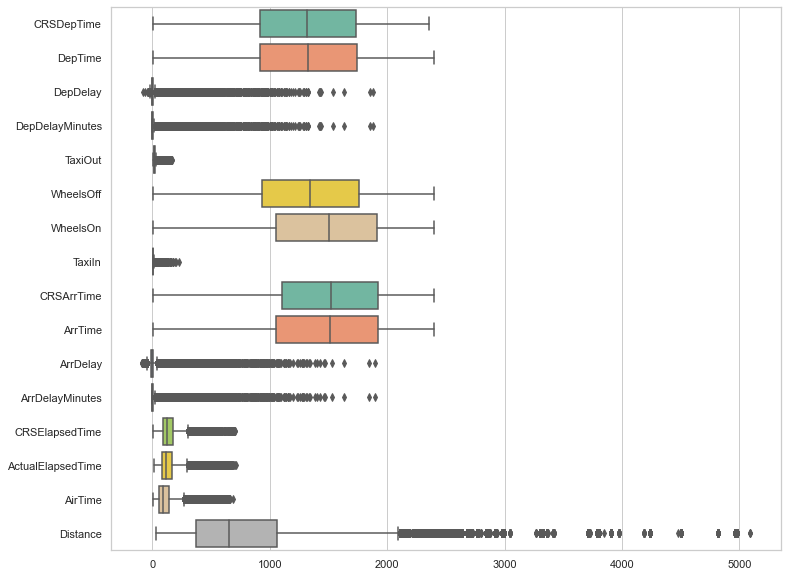

In [ ]:
# Visualize outliers with box plots
sns.boxplot(data=airline_df[outliers_cols], orient="h", palette="Set2")

&rightarrow; `DepDelay`, `DepDelayMinutes`, `ArrDelay`, `ArrDelayMinutes` have about 10% outliers. We will need to remove extreme outliers.

### Remove extreme outliers

In [ ]:
# Removing the outliers from the columns with extreme outlier values
extreme_outlier_cols = ["DepDelay", "DepDelayMinutes", "ArrDelay", "ArrDelayMinutes"]
for col in extreme_outlier_cols:
  remove_outliers(airline_df, col)

In [ ]:
# Re-checking the dataframe after removing extreme outliers
for col in extreme_outlier_cols:
  check_outliers(airline_df, col)

Column: DepDelay. Lower boundary: -16.5. Upper boundary: 11.5. Percentage of outliers: 7.94%
Column: DepDelayMinutes. Lower boundary: 0.0. Upper boundary: 0.0. Percentage of outliers: 19.16%
Column: ArrDelay. Lower boundary: -42.0. Upper boundary: 30.0. Percentage of outliers: 2.87%
Column: ArrDelayMinutes. Lower boundary: 0.0. Upper boundary: 0.0. Percentage of outliers: 20.66%


### Possible next steps: map airline codes to their names (ex. United, Qatar, etc.)